In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea 

In [22]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer

In [58]:
import re 

In [68]:
import gensim
from gensim import corpora
from gensim.models import LdaModel,LdaMulticore

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [54]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [24]:
nltk.download('stopwords')
stop_word=stopwords.words('english')
stemmer=PorterStemmer()
lemitizer=WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
df=pd.read_csv('/content/drive/MyDrive/simplilearn projects /natural language processing /nlp project 1/K8 Reviews v0.2.csv')

In [26]:
df.shape

(14675, 2)

In [27]:
df.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


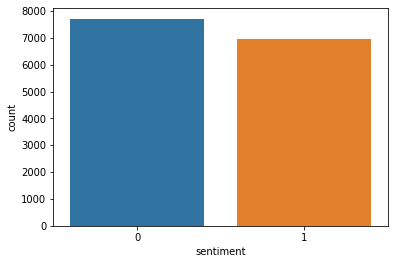

In [6]:
sea.countplot(df['sentiment'])

In [28]:
df['review1']=df['review'].apply(lambda x: x.lower())

In [29]:
df['review1']=df['review1'].apply(lambda x:word_tokenize(x))

In [30]:
import spacy

In [31]:
nlp=spacy.load('en_core_web_sm')

In [48]:
def pos(text):
  var1=[]
  doc=nlp(text)
  for token in doc:
    if token.pos_=='NOUN':
      var1.append(token.text)
  return var1

In [49]:
pos(df['review'][0])

['updates', 'improvements']

In [50]:
df['pos_tag']=df['review'].apply(lambda x:pos(x))

In [56]:
df.head()

,sentiment,review,review1,pos_tag
0,1,Good but need updates and improvements,"[good, but, need, updates, and, improvements]","[update, improvement]"
1,0,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, i, have, bought, ever, ,, batt...","[mobile, hell, hour, internet, us, lie, batter..."
2,1,when I will get my 10% cash back.... its alrea...,"[when, i, will, get, my, 10, %, cash, back, .....","[%, cash]"
3,1,Good,[good],[]
4,0,The worst phone everThey have changed the last...,"[the, worst, phone, everthey, have, changed, t...","[phone, everThey, phone, problem, amazon, phone]"


In [52]:
def clean(text):
  var1=[]
  for word in text:
      var1.append(lemitizer.lemmatize(word))
  return var1

In [61]:
def stop(text):
  var1=[]
  for word in text:
    if word not in stop_word:
      var1.append(word)
  return var1

In [62]:
df['pos_tag']=df['pos_tag'].apply(lambda x:stop(x))

In [63]:
df['pos_tag']=df['pos_tag'].apply(lambda x:clean(x))

In [64]:
df['pos_tag1']=df['pos_tag'].apply(lambda x:' '.join(x))

In [65]:
def cleaning(text):
  text=re.sub('[^a-zA-Z]',' ',text)
  return text

In [66]:
df['pos_tag1']=df['pos_tag1'].apply(lambda x:cleaning(x))

In [67]:
df.head()

,sentiment,review,review1,pos_tag,pos_tag1
0,1,Good but need updates and improvements,"[good, but, need, updates, and, improvements]","[update, improvement]",update improvement
1,0,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, i, have, bought, ever, ,, batt...","[mobile, hell, hour, internet, u, lie, battery...",mobile hell hour internet u lie battery charge...
2,1,when I will get my 10% cash back.... its alrea...,"[when, i, will, get, my, 10, %, cash, back, .....","[%, cash]",cash
3,1,Good,[good],[],
4,0,The worst phone everThey have changed the last...,"[the, worst, phone, everthey, have, changed, t...","[phone, everThey, phone, problem, amazon, phone]",phone everThey phone problem amazon phone


In [71]:
corpus=[]
for text in df['pos_tag1']:
  corpus.append(text)

In [70]:
len(corpus)

14675

In [72]:
text=[]
for line in corpus:
  text.append(line.split())

In [73]:
len(text)

14675

In [74]:
dictionary=corpora.Dictionary(text)

In [75]:
my_corpus=[]
for word in text:
  my_corpus.append(dictionary.doc2bow(word))

In [76]:
len(my_corpus)

14675

In [78]:
lda_model = LdaMulticore(corpus=my_corpus,
                         id2word=dictionary,
                         random_state=100,
                         num_topics=12,
                         passes=10,
                         chunksize=1000,
                         batch=False,
                         alpha='asymmetric',
                         decay=0.5,
                         offset=64,
                         eta=None,
                         eval_every=0,
                         iterations=100,
                         gamma_threshold=0.001,
                         per_word_topics=True)

In [79]:
lda_model.save('lda_model.model')

In [80]:
lda_model.print_topics(-1)

[(0,
  '0.155*"phone" + 0.063*"battery" + 0.026*"issue" + 0.020*"time" + 0.019*"day" + 0.019*"price" + 0.019*"camera" + 0.018*"performance" + 0.014*"problem" + 0.012*"hour"'),
 (1,
  '0.123*"product" + 0.092*"mobile" + 0.069*"problem" + 0.042*"money" + 0.036*"issue" + 0.027*"service" + 0.025*"heating" + 0.018*"network" + 0.016*"time" + 0.015*"day"'),
 (2,
  '0.125*"Phone" + 0.120*"Battery" + 0.062*"screen" + 0.039*"option" + 0.032*"backup" + 0.028*"work" + 0.025*"headphone" + 0.020*"cast" + 0.019*"gallery" + 0.019*"Screen"'),
 (3,
  '0.104*"speaker" + 0.059*"phone" + 0.048*"box" + 0.040*"earphone" + 0.038*"side" + 0.035*"volume" + 0.034*"sound" + 0.018*"button" + 0.013*"show" + 0.013*"class"'),
 (4,
  '0.020*"bhi" + 0.016*"PRODUCT" + 0.015*"pack" + 0.014*"BATTERY" + 0.014*"SIM" + 0.011*"MI" + 0.010*"CALL" + 0.009*"hype" + 0.008*"theme" + 0.008*"running"'),
 (5,
  '0.139*"camera" + 0.081*"quality" + 0.052*"phone" + 0.028*"feature" + 0.016*"mode" + 0.015*"depth" + 0.015*"performance" + 0

In [81]:
from gensim.models import CoherenceModel

In [82]:
lda_model_coherence = CoherenceModel(model=lda_model,texts=text,dictionary=dictionary,
                                    coherence='c_v')

In [83]:
coherence_lda = lda_model_coherence.get_coherence()
print('\nCoherence Score:',coherence_lda)


Coherence Score: 0.5526065744476841


In [87]:
def compute_coherence_score(corpus,dictionary,k,a):
    #instantiate the model instance based on k,a and b
    lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=dictionary,num_topics=k,alpha=a,
                                           passes=10)
    lda_model_coherence = CoherenceModel(model=lda_model,texts=text,dictionary=dictionary,coherence='c_v')
    return lda_model_coherence.get_coherence()

In [88]:
alpha =['symmetric','asymmetric']

for x in alpha:
    print('Coherence Model with alpha = {}'.format(x))
    print('-------------------------------------------')
    print('\n')
    for i in range(5,10):
        score = compute_coherence_score(corpus=my_corpus,dictionary=dictionary,k=i,a=x)        
        print(f'Coherence score with {i} topics is {score}')
        print('\n')

Coherence Model with alpha = symmetric
-------------------------------------------


Coherence score with 5 topics is 0.5666731978650074


Coherence score with 6 topics is 0.540626452409843


Coherence score with 7 topics is 0.5402461024340826


Coherence score with 8 topics is 0.5930777769129563


Coherence score with 9 topics is 0.5199075911256509


Coherence Model with alpha = asymmetric
-------------------------------------------


Coherence score with 5 topics is 0.5552424180659641


Coherence score with 6 topics is 0.5534565281703909


Coherence score with 7 topics is 0.5633191259609192


Coherence score with 8 topics is 0.5521699910714056


Coherence score with 9 topics is 0.5834680217193067




In [89]:
lda_model_final = gensim.models.LdaMulticore(corpus=my_corpus,num_topics=8,id2word=dictionary,passes=10,workers=2,alpha='symmetric')

In [90]:
from pprint import pprint

In [91]:
pprint(lda_model_final.print_topics())

[(0,
  '0.044*"product" + 0.032*"speaker" + 0.025*"handset" + 0.021*"customer" + '
  '0.020*"experience" + 0.019*"replacement" + 0.019*"return" + '
  '0.017*"headphone" + 0.016*"earphone" + 0.014*"set"'),
 (1,
  '0.133*"product" + 0.118*"battery" + 0.115*"mobile" + 0.052*"Battery" + '
  '0.047*"performance" + 0.039*"backup" + 0.027*"quality" + 0.021*"heat" + '
  '0.021*"drain" + 0.020*"problem"'),
 (2,
  '0.033*"camera" + 0.027*"Heating" + 0.026*"screen" + 0.025*"problem" + '
  '0.022*"quality" + 0.020*"sound" + 0.019*"Mobile" + 0.018*"video" + '
  '0.017*"sensor" + 0.017*"time"'),
 (3,
  '0.056*"feature" + 0.053*"phone" + 0.038*"call" + 0.034*"screen" + '
  '0.029*"option" + 0.021*"app" + 0.017*"Phone" + 0.012*"sim" + 0.012*"G" + '
  '0.012*"recording"'),
 (4,
  '0.076*"problem" + 0.059*"issue" + 0.045*"phone" + 0.039*"time" + '
  '0.037*"day" + 0.031*"battery" + 0.028*"heating" + 0.021*"network" + '
  '0.021*"update" + 0.021*"month"'),
 (5,
  '0.430*"phone" + 0.045*"price" + 0.034*"d

In [92]:
doc_lda = lda_model_final[my_corpus]

In [93]:
doc_lda